   Poids_poulet_g  Nourriture_consommee_g_jour  Temperature_enclos_C  \
0            3974                           52                  27.6   
1            1660                          152                  31.7   
2            2094                          186                  30.1   
3            1930                          111                  29.2   
4            1895                          100                  26.1   

   Humidite_%  Age_poulet_jours  Gain_poids_jour_g  Taux_survie_%  \
0        79.3                24               12.0           81.1   
1        62.5                42               12.2           89.1   
2        64.8                29               18.8           90.4   
3        87.0                63               13.8           92.9   
4        78.2                21                5.5           93.0   

   Cout_elevage_FCFA  
0               2682  
1               6626  
2               8424  
3               1933  
4               4598  
Index(['Poids_

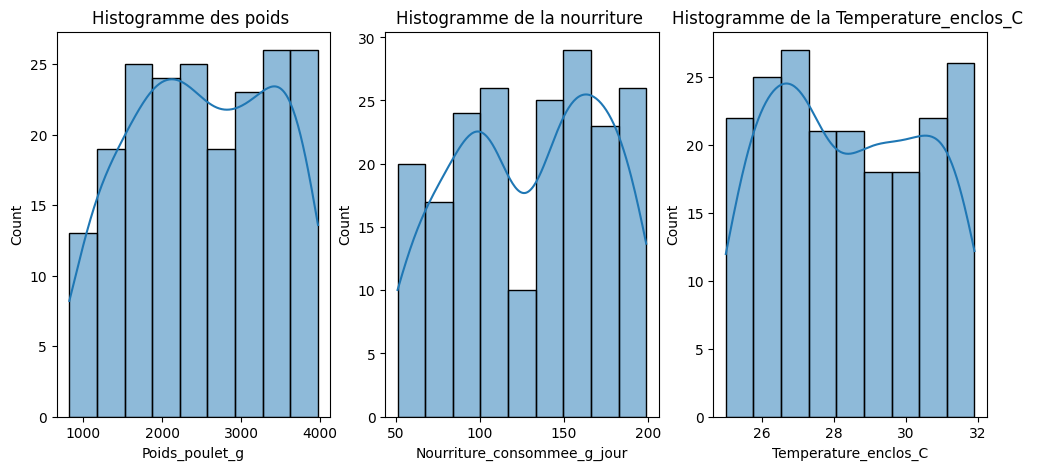

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from scipy.stats import zscore




# exercice1

# Chargement du dataset depuis un fichier CSV
data = pd.read_csv(r'C:\Users\me\Desktop\M1SDTS\ATDN\ATDN2\TP2\donnees_elevage_poulet.csv')

# Afficher les premières lignes pour vérifier que les données sont bien chargées
print(data.head())

print(data.columns)
# Mesures de tendance centrale

descriptive_stats = {
    
    #moyenne
    'mean_poid': data['Poids_poulet_g'].mean(),
    'mean_Nourriture_consommee_g_jour ': data['Nourriture_consommee_g_jour'].mean(),
    'mean_temperature' :data['Temperature_enclos_C'].mean(),
    #mediane 
    'median_poid' : data['Poids_poulet_g'].median(),
    'median_nourriture' : data['Nourriture_consommee_g_jour'].median(),
    'median_temperature' :data['Temperature_enclos_C'].median(),
   
    
    # Calcul de la variance
    'varPoid' : data['Poids_poulet_g'].var(),
    'vartemperature' : data['Temperature_enclos_C'].var(),
    'varNourriture' : data['Nourriture_consommee_g_jour'].var(),

    # Calcul de l'écart-type
    'ecart_typePoid ':data['Poids_poulet_g'].std(),
    'ecart_typeNourriture ':data['Nourriture_consommee_g_jour'].std(),
    'ecart_typeTemperature ':data['Temperature_enclos_C'].std(),

    # Calcul des quartiles
    'quartilesPoid ':data['Poids_poulet_g'].quantile([0.25, 0.5, 0.75]),
    'quartilesNourriture ':data['Nourriture_consommee_g_jour'].quantile([0.25, 0.5, 0.75]),
    'quartilesTemperature ':data['Temperature_enclos_C'].quantile([0.25, 0.5, 0.75])
    
}
for i, value in descriptive_stats.items():
    print(f"{i}: {value}")

#histogramme

plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.histplot(data['Poids_poulet_g'],kde=True)
plt.title('Histogramme des poids ')


plt.subplot(1,3,2)
sns.histplot(data['Nourriture_consommee_g_jour'],kde=True)
plt.title('Histogramme de la nourriture ')

plt.subplot(1,3,3)
sns.histplot(data['Temperature_enclos_C'],kde=True)
plt.title('Histogramme de la Temperature_enclos_C ')
plt.show()



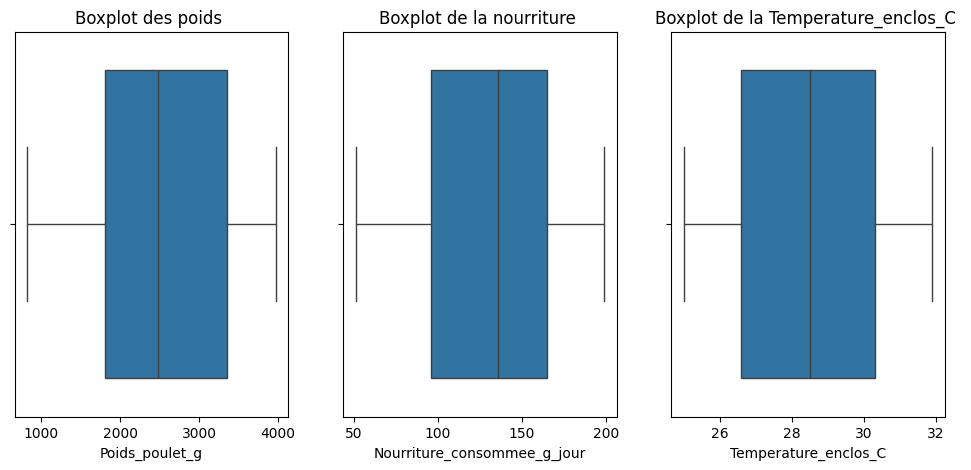

In [3]:
# Visualisation avec des boxplots
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.boxplot(x=data['Poids_poulet_g'])
plt.title('Boxplot des poids ')


plt.subplot(1,3,2)
sns.boxplot(x=data['Nourriture_consommee_g_jour'])
plt.title('Boxplot de la nourriture ')

plt.subplot(1,3,3)
sns.boxplot(x=data['Temperature_enclos_C'])
plt.title('Boxplot de la Temperature_enclos_C ')
plt.show()


 methode Zscore 

Poids_poulet_g                 86
Nourriture_consommee_g_jour    82
Temperature_enclos_C           87
dtype: int64

 methode interquantile 
 
Poids_poulet_g                 0
Nourriture_consommee_g_jour    0
Temperature_enclos_C           0
Humidite_%                     0
Age_poulet_jours               0
Gain_poids_jour_g              0
Taux_survie_%                  0
Cout_elevage_FCFA              0
dtype: int64


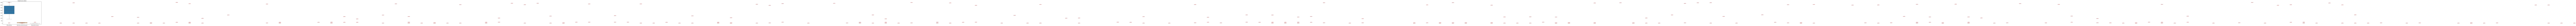

In [ ]:
#Exercice2 : Detection d'outlier 
print('\n methode Zscore \n')
z_scores=data[['Poids_poulet_g','Nourriture_consommee_g_jour','Temperature_enclos_C']].apply(zscore)

outliers_z=(z_scores.abs()>1)
print(outliers_z.sum()) #nombre de valeur aberrantes par colonne 

print('\n methode interquantile \n ')

Q1=data.quantile(0.25)# 1er quantile
Q2=data.quantile(0.50)
Q3=data.quantile(0.75)

IQR=Q3-Q1 #etendue interquatile

#definition des bornes pour detecter les valeurs aberrantes
borne_inf= Q1-1.5*IQR
borne_sup=Q3+1.5*IQR


#affichage des outliers
outliers_IQR=((data<borne_inf)| data>borne_sup)

print(outliers_IQR.sum())


# Boxplot annoté
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C']])
for col in ['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C']:
    for i, value in enumerate(data[col]):
        if outliers_IQR[col][i] or outliers_z[col][i]:
            plt.text(i, value, 'outlier', horizontalalignment='center', color='red')
plt.title('Boxplot avec outliers')
plt.show()


 
 test de normalite 

Test de Shapiro-Wilk pour Poids_poulet_g: Stat=0.957, p-value=0.000
Poids_poulet_g ne suit pas une distribution normale.

None
Test de Shapiro-Wilk pour Age_poulet_jours: Stat=0.960, p-value=0.000
Age_poulet_jours ne suit pas une distribution normale.

None
Test de Shapiro-Wilk pour Temperature_enclos_C: Stat=0.943, p-value=0.000
Temperature_enclos_C ne suit pas une distribution normale.

None
Test de Shapiro-Wilk pour Nourriture_consommee_g_jour: Stat=0.945, p-value=0.000
Nourriture_consommee_g_jour ne suit pas une distribution normale.

None
   Age_poulet_jours groupe_age
0                24      Jeune
1                42     Adulte
2                29      Jeune
3                63     Adulte
4                21      Jeune
Test t de Student entre 'Jeune' et 'Adulte': Stat=0.155, p-value=0.877
Les moyennes des groupes 'Jeune' et 'Adulte' ne sont pas significativement différentes.
ANOVA pour comparer les moyennes des groupes 'Jeune', 'Adulte' et 'Vieux': Stat=0.

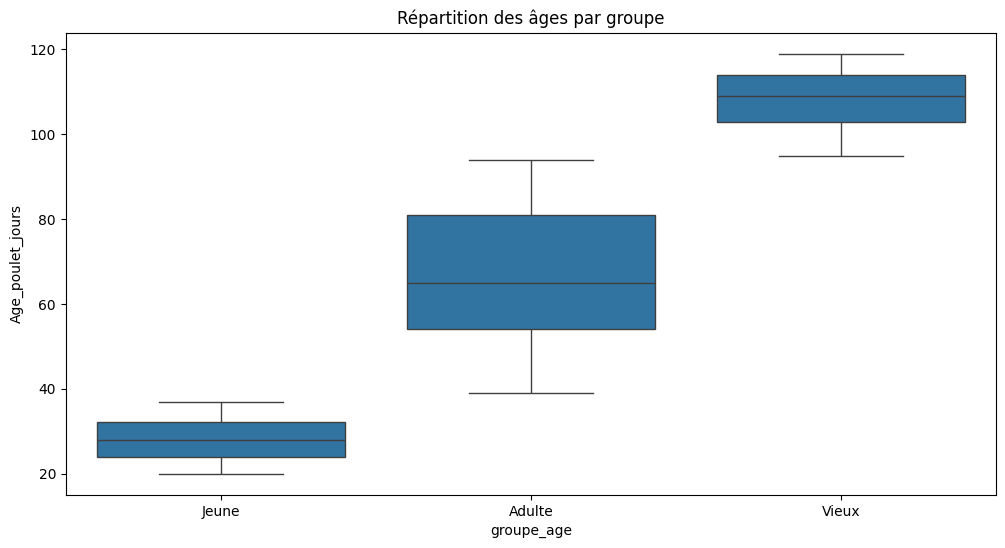

In [5]:
#Exercice 3 


from scipy.stats import shapiro, ttest_ind, f_oneway


# Test de normalité avec le test de Shapiro-Wilk
def test_normalite(variable):
    stat, p_value = shapiro(data[variable])
    print(f"Test de Shapiro-Wilk pour {variable}: Stat={stat:.3f}, p-value={p_value:.3f}")
    if p_value > 0.05:
        print(f"{variable} suit une distribution normale.\n")
    else:
        print(f"{variable} ne suit pas une distribution normale.\n")
        
print(" \n test de normalite \n")
print(test_normalite('Poids_poulet_g'))
print(test_normalite('Age_poulet_jours'))
print(test_normalite('Temperature_enclos_C'))
print(test_normalite('Nourriture_consommee_g_jour'))

# Création des groupes basés sur l'âge
# Calcul de l'âge moyen et de l'écart-type
age_moyen = data['Age_poulet_jours'].mean()
age_std = data['Age_poulet_jours'].std()

borne_inf = age_moyen - age_std
borne_sup = age_moyen + age_std

# Créer des groupes basés sur l'âge
data['groupe_age'] = pd.cut(data['Age_poulet_jours'], bins=[-float('inf'), borne_inf, borne_sup, float('inf')], labels=['Jeune', 'Adulte', 'Vieux'])

# Afficher les groupes créés
print(data[['Age_poulet_jours', 'groupe_age']].head())

# Test t de Student : Comparer les groupes d'âge
group1 = data[data['groupe_age'] == 'Jeune']['Poids_poulet_g']
group2 = data[data['groupe_age'] == 'Adulte']['Poids_poulet_g']

# Test t de Student
stat, p_value = ttest_ind(group1, group2)
print(f"Test t de Student entre 'Jeune' et 'Adulte': Stat={stat:.3f}, p-value={p_value:.3f}")
if p_value < 0.05:
    print("Les moyennes des groupes 'Jeune' et 'Adulte' sont significativement différentes.")
else:
    print("Les moyennes des groupes 'Jeune' et 'Adulte' ne sont pas significativement différentes.")

# ANOVA : Comparer les moyennes des trois groupes ('Jeune', 'Adulte', 'Vieux')
group1 = data[data['groupe_age'] == 'Jeune']['Poids_poulet_g']
group2 = data[data['groupe_age'] == 'Adulte']['Poids_poulet_g']
group3 = data[data['groupe_age'] == 'Vieux']['Poids_poulet_g']

# ANOVA
stat, p_value = f_oneway(group1, group2, group3)
print(f"ANOVA pour comparer les moyennes des groupes 'Jeune', 'Adulte' et 'Vieux': Stat={stat:.3f}, p-value={p_value:.3f}")
if p_value < 0.05:
    print("Les moyennes des trois groupes sont significativement différentes.")
else:
    print("Les moyennes des trois groupes ne sont pas significativement différentes.")

# Affichage des résultats graphiques (optionnel pour mieux visualiser les groupes)
plt.figure(figsize=(12, 6))

# Boxplot pour visualiser la distribution de l'âge par groupe
sns.boxplot(x='groupe_age', y='Age_poulet_jours', data=data)
plt.title('Répartition des âges par groupe')
plt.show()


Valeurs propres :  [7.44606980e+06 8.06405881e+05 1.93537260e+03 7.72927298e+02
 7.66898743e+01 3.77931473e+01 1.74241390e+01 4.01781313e+00]
Vecteurs propres :  [[-1.09599501e-02  9.99930852e-01 -3.74320815e-03 -1.67778205e-03
   6.90616948e-04 -9.23303394e-04 -1.20018395e-04  8.49182944e-06]
 [ 9.36531686e-04 -3.91218916e-03 -9.92430270e-01 -1.21879877e-01
  -4.71114452e-03 -7.53137937e-03  6.65237304e-03 -9.38622857e-03]
 [ 7.38926447e-05  5.14307439e-05  8.60234826e-03  7.93083862e-03
   9.60055178e-03  2.25383776e-04  2.53695463e-02 -9.99563534e-01]
 [ 1.62151297e-04  7.61361027e-04  4.23675819e-03  2.09118733e-03
  -9.98463902e-01  5.32978865e-02  1.09887984e-02 -9.24596456e-03]
 [ 6.47480242e-04 -1.20786389e-03  1.22008539e-01 -9.92465029e-01
  -1.96248913e-03 -8.16466529e-03 -2.62981874e-03 -6.91194962e-03]
 [ 1.10461583e-04  1.41394752e-04  6.60583621e-03 -2.09837923e-03
   1.11899455e-02  7.52416017e-03  9.99559347e-01  2.55188299e-02]
 [-2.14926155e-04 -8.45970963e-04  6.769

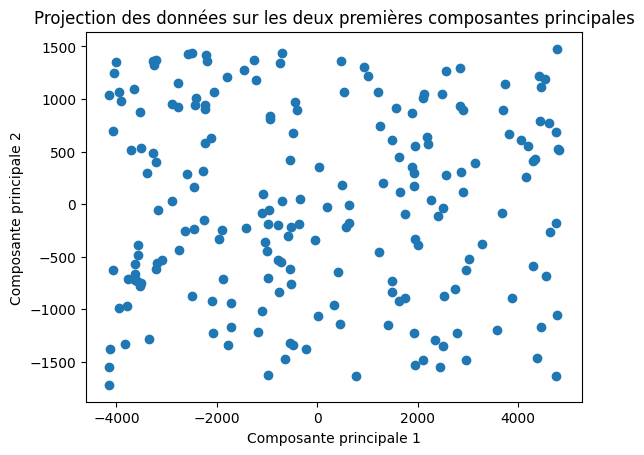

Variance expliquée cumulée : [0.90197229 0.99965547 0.99988991 0.99998353 0.99999282 0.9999974
 0.99999951 1.        ]


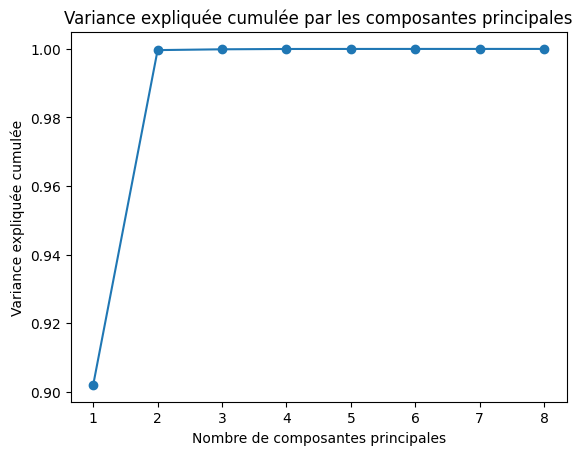

In [30]:
# Partie 2 - ACP et KernelPCA pour l'âge
#exercice 4
# Sélectionner uniquement les colonnes numériques
data_numerique = data.select_dtypes(include=[np.number])

# Centrer les données (soustraction de la moyenne de chaque variable)
données_centrees = data_numerique - data_numerique.mean()

# Calculer la matrice de covariance
matrice_covariance = np.cov(données_centrees.T)

# Calculer les valeurs propres et les vecteurs propres
valeurs_propres, vecteurs_propres = np.linalg.eig(matrice_covariance)

# Trier les valeurs propres par ordre décroissant et réorganiser les vecteurs propres en conséquence
indices_tries = np.argsort(valeurs_propres)[::-1]
valeurs_propres_tries = valeurs_propres[indices_tries]
vecteurs_propres_tries = vecteurs_propres[:, indices_tries]

# Afficher les résultats
print("Valeurs propres : ", valeurs_propres_tries)
print("Vecteurs propres : ", vecteurs_propres_tries)

# Projection des données sur les 2 premières composantes principales
top_2_vecteurs_propres = vecteurs_propres_tries[:, :2]  # Prenez les deux premiers vecteurs propres
données_projetees = np.dot(données_centrees, top_2_vecteurs_propres)

# Visualisation des données projetées
plt.scatter(données_projetees[:, 0], données_projetees[:, 1])
plt.title('Projection des données sur les deux premières composantes principales')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()






# Choix du nombre de composantes à garder
# Calcul de la variance expliquée cumulée
ratio_variance_expliquee = valeurs_propres_tries / np.sum(valeurs_propres_tries)
variance_cumulee = np.cumsum(ratio_variance_expliquee)

print("Variance expliquée cumulée :", variance_cumulee)

# Visualiser la variance expliquée cumulée
plt.plot(range(1, len(variance_cumulee) + 1), variance_cumulee, marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée par les composantes principales')
plt.show()




Index(['Poids_poulet_g', 'Nourriture_consommee_g_jour', 'Temperature_enclos_C',
       'Humidite_%', 'Age_poulet_jours', 'Gain_poids_jour_g', 'Taux_survie_%',
       'Cout_elevage_FCFA'],
      dtype='object')


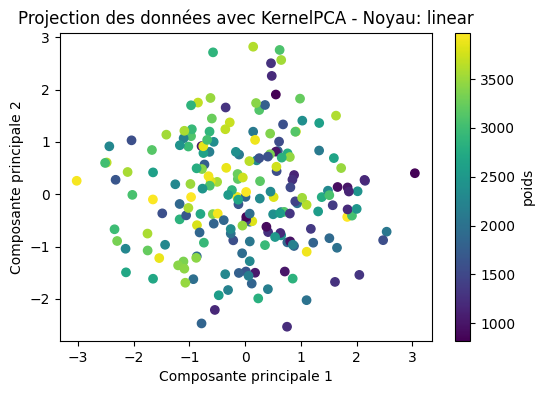

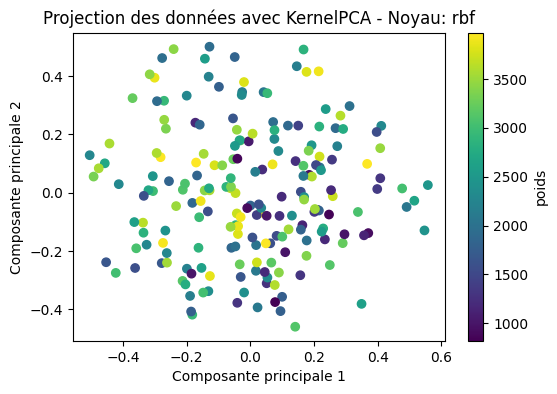

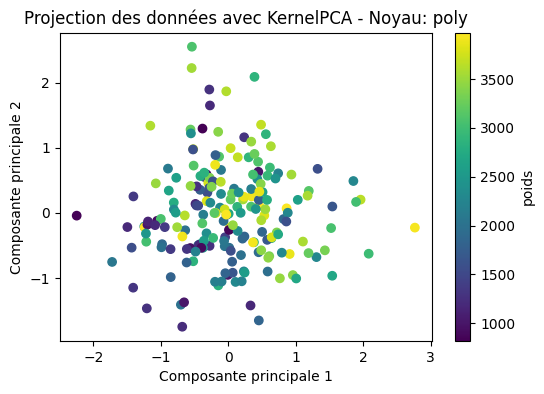

In [49]:
data_numerique = data.select_dtypes(include=[np.number])  # Sélectionner les colonnes numériques
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerique)  # Standardisation des données

#Appliquer KernelPCA avec différents noyaux
noyaux = ['linear', 'rbf', 'poly']  # Liste des noyaux à tester
composantes = 2  # Nous allons réduire à 2 dimensions pour la visualisation
print(data.columns)

for noyau in noyaux:
    # Initialiser KernelPCA avec le noyau choisi
    kpca = KernelPCA(kernel=noyau, n_components=composantes)
    
    # Ajuster et transformer les données
    données_projetees = kpca.fit_transform(data_scaled)
    
    # Utilisation de la colonne 'groupe_poids' convertie en codes numériques
    plt.figure(figsize=(6, 4))
    plt.scatter(données_projetees[:, 0], données_projetees[:, 1], c=data['Poids_poulet_g'], cmap='viridis')
    plt.title(f'Projection des données avec KernelPCA - Noyau: {noyau}')
    plt.xlabel('Composante principale 1')
    plt.ylabel('Composante principale 2')
    plt.colorbar(label='poids')  # Ajouter une légende pour la couleur
    plt.show()


In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Charger les données
data = pd.read_csv(r'C:\Users\me\Desktop\M1SDTS\ATDN\ATDN2\TP2\donnees_elevage_poulet.csv')


# Transformer Taux_survie_% en binaire (0 = non, 1 = survie)
data['Survie_binaire'] = (data['Taux_survie_%'] >= 90).astype(int)

# Définir les variables explicatives (on enlève Taux_survie_% et la nouvelle colonne binaire)
X = data.drop(columns=['Taux_survie_%', 'Survie_binaire'])
y = data['Survie_binaire']

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

# Évaluer les performances
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.4f}")
print(f"F1-score : {f1:.4f}")


Accuracy : 0.6000
F1-score : 0.6000


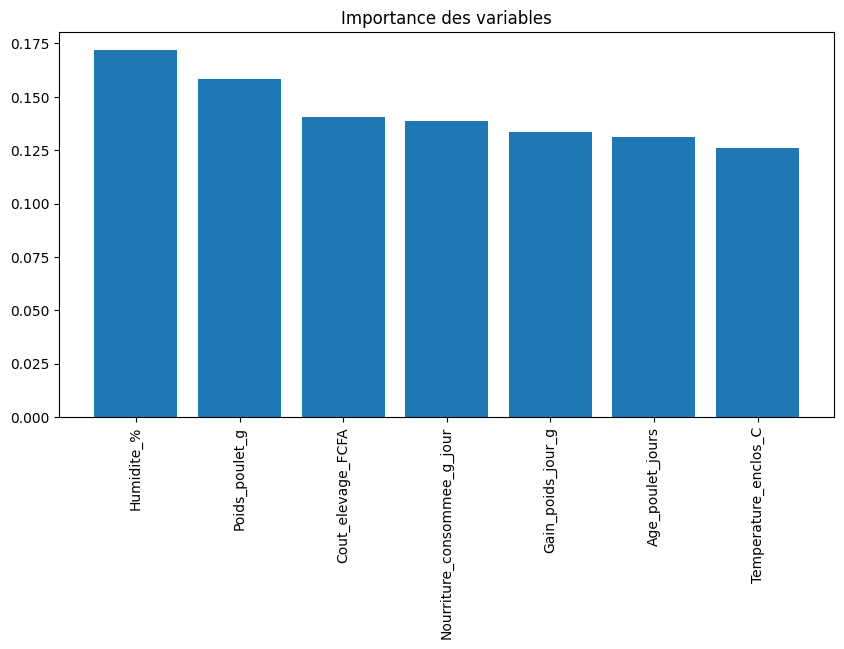

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Importance des variables
feature_importances = rf.feature_importances_
features = X.columns

# Trier par importance
indices = np.argsort(feature_importances)[::-1]

# Afficher le graphique
plt.figure(figsize=(10, 5))
plt.title("Importance des variables")
plt.bar(range(len(features)), feature_importances[indices], align="center")
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.show()


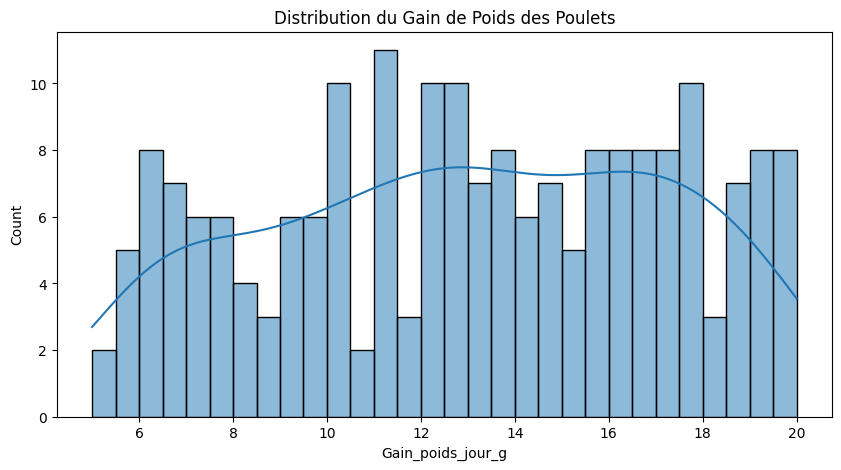

In [18]:
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns

# Charger les données
data = pd.read_csv(r'C:\Users\me\Desktop\M1SDTS\ATDN\ATDN2\TP2\donnees_elevage_poulet.csv')
plt.figure(figsize=(10, 5))
sns.histplot(data['Gain_poids_jour_g'], bins=30, kde=True)
plt.title("Distribution du Gain de Poids des Poulets")
plt.show()

# Définir les variables explicatives et la cible (Gain de poids)
X = data.drop(columns=['Gain_poids_jour_g'])
y = data['Gain_poids_jour_g']

# Séparer les données en Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Séparation des features et de la cible
X = data.drop(columns=['Gain_poids_jour_g'])
y = data['Gain_poids_jour_g']

# Division en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle AdaBoost
adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
adaboost.fit(X_train_scaled, y_train)
y_pred_ada = adaboost.predict(X_test_scaled)

# Modèle Gradient Boosting
gboost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gboost.fit(X_train_scaled, y_train)
y_pred_gb = gboost.predict(X_test_scaled)



 AdaBoost (Standardized) :
   MAE  : 4.286589968932665
   RMSE : 5.051638467986863
   R²   : -0.20972072870344682

 Gradient Boosting (Standardized) :
   MAE  : 4.960852837484425
   RMSE : 2.395950877968845
   R²   : -0.5621841905390981


c:\Users\me\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\me\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n {model_name} :")
    print(f"  MAE  : {mae:.4f}")
    print(f"  RMSE : {rmse:.4f}")
    print(f"  R²   : {r2:.4f}")

evaluate_model(y_test, y_pred_ada, "AdaBoost")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")



 AdaBoost :
  MAE  : 4.2866
  RMSE : 5.0516
  R²   : -0.2097

 Gradient Boosting :
  MAE  : 4.9609
  RMSE : 5.7406
  R²   : -0.5622
